---
---

# Differences in Differences


## Bit by Bit: Social Research in the Digital Age


---
---

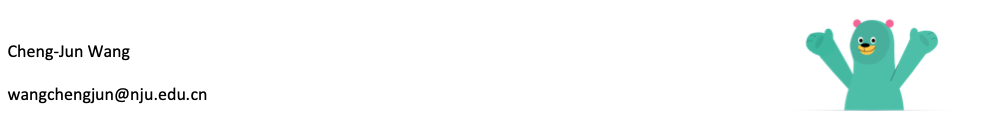

http://www.masteringmetrics.com/resources/

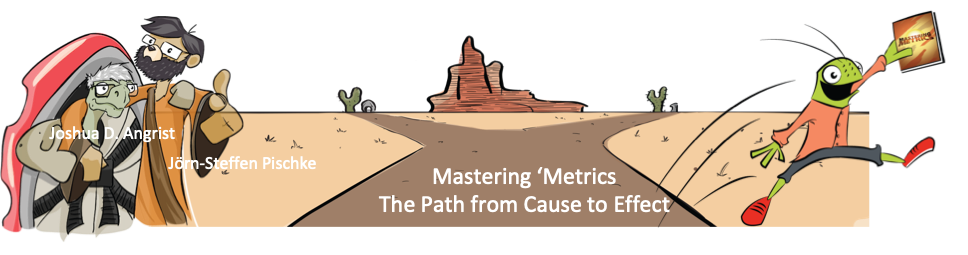

Credible instrumental variables and dramatic policy discontinuities can be hard to find; you’ll need other ’metrics tools in your kit too.

- Treatment and control outcomes move in parallel in the absence of treatment. 
- The divergence of a post-treatment path from the trend established by a comparison group may signal a treatment effect.


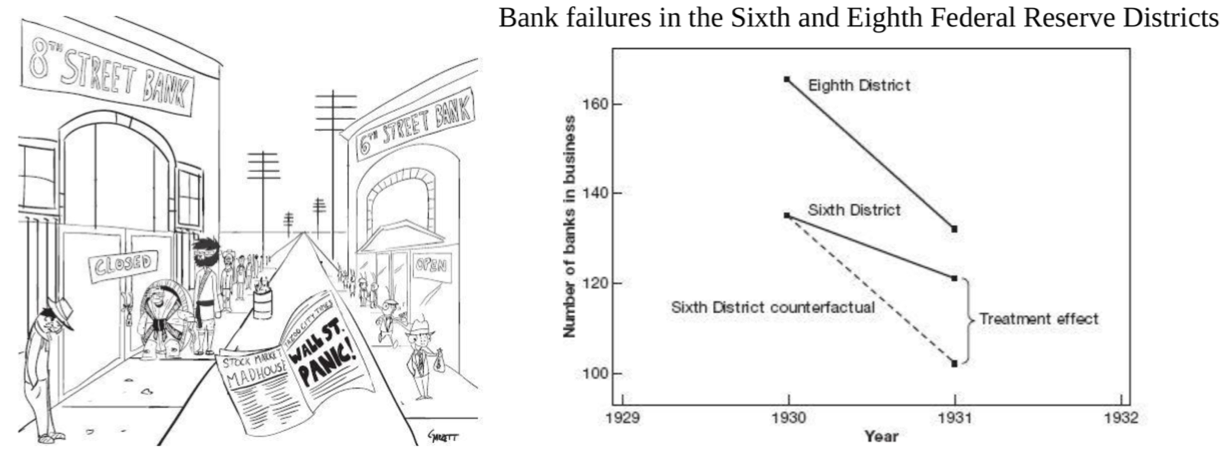

Compare across time

\begin{align}
  \delta_{DD} &= (Y_{6,1931} - Y_{6,1930}) - (Y_{8,1931} - Y_{8,1930}) \notag\\
   &= (121-135)-(132-165) \notag\\
   &= 19 \notag
\end{align}

Compare across space

\begin{align}
  \delta_{DD} &= (Y_{6,1931} - Y_{8,1931}) - (Y_{6,1930} - Y_{8,1930}) \notag\\
   &= (121-132)-(135-165) \notag\\
   &= 19 \notag
\end{align}

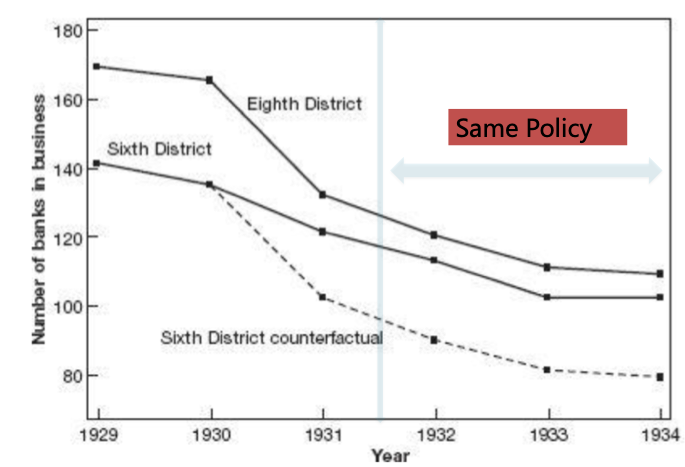

$$Y_{dt} = \alpha + \beta TREAT_d + \gamma POST_t + \delta_{rDD} (TREAT_d \times POST_t) + \epsilon_{dt}$$

- $TREAT_d$: a dummy for the treatmeng district
- $POST_t$: a dummy for the post-treatment periods
- $TREAT_d \times POST_t$: the interaction term
- $\delta$ is the DD causal effect

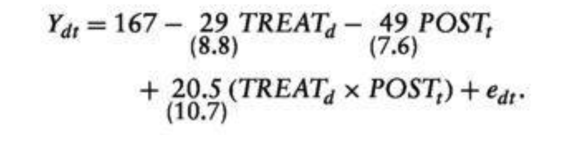

**Diff-in-Diff estimates of the effect of the minimum legal drinking age (MLDA) on mortality**

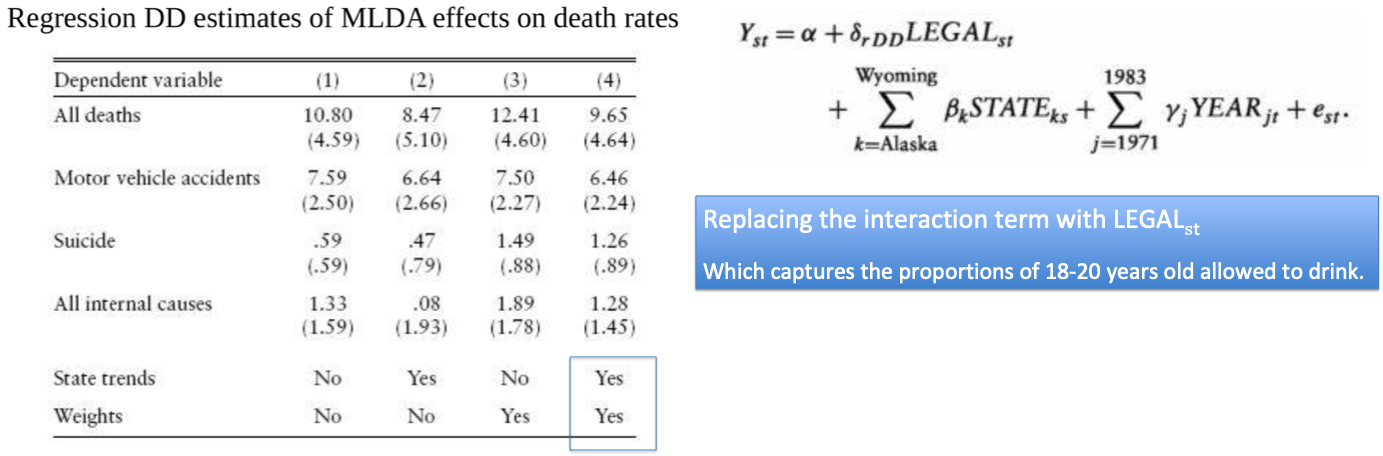

In [1]:
ssc install diff

checking diff consistency and verifying not already installed...
installing into /Users/datalab/Library/Application Support/Stata/ado/plus/...
installation complete.


** ReadMe_MLDA_DD.txt **

This folder contains the data and programs used to generate Tables 5.2 and 5.3 in Mastering Metrics, which present Diff-in-Diff estimates of the effect of the minimum legal drinking age (MLDA) on mortality.

Data: 
* /MLDA (DD)/Data/deaths.dta

Code: 
* /MLDA (DD)/Code/analysis.do

In [10]:
* Filename: analysis.do
* Description: This program generates Tables 5.2 and 5.3 in Mastering 'Metrics.
* Modified lightly by Jon Petkun, January 20, 2015

set more off

clear all
* Set directory to location of data
cd "/Users/datalab/bigdata/mastering_metrics_data/"
use "deaths.dta"




/Users/datalab/bigdata/mastering_metrics_data



* help xi

xi -- Interaction expansion

In [12]:
xi: reg mrate legal


      Source |       SS           df       MS      Number of obs   =    24,786
-------------+----------------------------------   F(1, 24784)     =    401.34
       Model |  696332.008         1  696332.008   Prob > F        =    0.0000
    Residual |  43000748.2    24,784   1735.0205   R-squared       =    0.0159
-------------+----------------------------------   Adj R-squared   =    0.0159
       Total |  43697080.2    24,785   1763.0454   Root MSE        =    41.654

------------------------------------------------------------------------------
       mrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       legal |   10.98997   .5485808    20.03   0.000     9.914719    12.06522
       _cons |   32.42324   .3606016    89.91   0.000     31.71644    33.13004
------------------------------------------------------------------------------


In [15]:
* no trends, no weights
* death cause: 1=all, 2=MVA, 3=suicide, 6=internal
xi: reg mrate legal i.state i.year if year <= 1983 & agegr == 2 & dtype == 1, cluster(state)

i.state           _Istate_1-56        (naturally coded; _Istate_1 omitted)
i.year            _Iyear_1970-1996    (naturally coded; _Iyear_1970 omitted)
note: _Iyear_1984 omitted because of collinearity
note: _Iyear_1985 omitted because of collinearity
note: _Iyear_1986 omitted because of collinearity
note: _Iyear_1987 omitted because of collinearity
note: _Iyear_1988 omitted because of collinearity
note: _Iyear_1989 omitted because of collinearity
note: _Iyear_1990 omitted because of collinearity
note: _Iyear_1991 omitted because of collinearity
note: _Iyear_1992 omitted because of collinearity
note: _Iyear_1993 omitted because of collinearity
note: _Iyear_1994 omitted because of collinearity
note: _Iyear_1995 omitted because of collinearity
note: _Iyear_1996 omitted because of collinearity

Linear regression                               Number of obs     =        714
                                                F(13, 50)         =          .
                                       

In [18]:
* construct table 5.2 in 'Metrics
* Regression DD Estimates of MLDA-Induced Deaths among 18-20 Year Olds, from 1970-1983

qui xi: reg mrate legal
outreg2 beertax using "table52.xls", replace bdec(2) sdec(2) excel noaster

* death cause: 1=all, 2=MVA, 3=suicide, 6=internal
foreach i in 1 2 3 6{

* no trends, no weights
qui xi: reg mrate legal i.state i.year if year <= 1983 & agegr == 2 & dtype == `i', cluster(state)
outreg2 legal using "table52.xls", append bdec(2) sdec(2) excel noaster cttop("`i'") cttop(" no tr, no w")

* time trends, no weights
qui xi: reg mrate legal i.state*year i.year if year <= 1983 & agegr == 2 & dtype == `i', cluster(state)
outreg2 legal using "table52.xls", append bdec(2) sdec(2) excel noaster cttop("`i'") cttop(" tr, no w")

* no trends, weights
qui xi: reg mrate legal i.state i.year if year <= 1983 & agegr == 2 & dtype == `i' [aw=pop], cluster(state)
outreg2 legal using "table52.xls", append bdec(2) sdec(2) excel noaster cttop("`i'") cttop(" no tr, w")

* time trends, weights
qui xi: reg mrate legal i.state*year i.year if year <= 1983 & agegr == 2 & dtype == `i' [aw=pop], cluster(state)
outreg2 legal using "table52.xls", append bdec(2) sdec(2) excel noaster cttop("`i'") cttop(" tr, w")
}
// */



table52.xls
dir : seeout

table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout
table52.xls
dir : seeout


|           | (1)    | (2)    | (3)    | (4)    | (5)    | (6)    | (7)    | (8)    | (9)    | (10)   | (11)   | (12)   | (13)   | (14)   | (15)   | (16)   | (17)   |
| --------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
|           |        | 1      | 1      | 1      | 1      | 2      | 2      | 2      | 2      | 3      | 3      | 3      | 3      | 6      | 6      | 6      | 6      |
|           |        | no tr  | tr     | no tr  | tr     | no tr  | tr     | no tr  | tr     | no tr  | tr     | no tr  | tr     | no tr  | tr     | no tr  | tr     |
|           |        | no w   | no w   | w      | w      | no w   | no w   | w      | w      | no w   | no w   | w      | w      | no w   | no w   | w      | w      |
| VARIABLES | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  | mrate  |
|           |        |        |        |        |        |        |        |        |        |        |        |        |        |        |        |        |        |
| legal     | 10.99  | 10.80  | 8.47   | 12.41  | 9.65   | 7.59   | 6.64   | 7.50   | 6.46   | 0.59   | 0.47   | 1.49   | 1.26   | 1.33   | 0.08   | 1.89   | 1.28   |
|           | (0.55) | (4.59) | (5.10) | (4.60) | (4.64) | (2.50) | (2.66) | (2.27) | (2.24) | (0.59) | (0.79) | (0.88) | (0.89) | (1.59) | (1.93) | (1.78) | (1.45) |

In [19]:
* Table 5.3.
* Regression DD Estimates of MLDA-Induced Deaths among 18-20 Year Olds, from 1970-1983, controlling for Beer Taxes

xi: reg mrate legal 
outreg2  beertax using "table53.xls", replace bdec(2) sdec(2) excel noaster cttop("`i'")

* no time trends
foreach i in 1 2 3 6 {
	qui xi: reg mrate legal beertax i.state i.year if year <= 1983 & agegr == 2 & dtype == `i', cluster(state)
	outreg2 legal beertax using "table53.xls", append bdec(2) sdec(2) excel noaster cttop("`i'") cttop("no t")
}

* with time trends
foreach i in 1 2 3 6 {
	qui xi: reg mrate legal beertax i.state*year i.year if year <= 1983 & agegr == 2 & dtype == `i', cluster(state)
	outreg2 legal beertax using "table53.xls", append bdec(2) sdec(2) excel noaster cttop("`i'") cttop("t")
}




      Source |       SS           df       MS      Number of obs   =    24,786
-------------+----------------------------------   F(1, 24784)     =    401.34
       Model |  696332.008         1  696332.008   Prob > F        =    0.0000
    Residual |  43000748.2    24,784   1735.0205   R-squared       =    0.0159
-------------+----------------------------------   Adj R-squared   =    0.0159
       Total |  43697080.2    24,785   1763.0454   Root MSE        =    41.654

------------------------------------------------------------------------------
       mrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       legal |   10.98997   .5485808    20.03   0.000     9.914719    12.06522
       _cons |   32.42324   .3606016    89.91   0.000     31.71644    33.13004
------------------------------------------------------------------------------

table53.xls
dir : seeout

table53.xls
dir : seeo

|           | (1)    | (2)    | (3)    | (4)    | (5)    | (6)     | (7)     | (8)    | (9)     |
| --------- | ------ | ------ | ------ | ------ | ------ | ------- | ------- | ------ | ------- |
|           |        | 1      | 2      | 3      | 6      | 1       | 2       | 3      | 6       |
|           |        | no t   | no t   | no t   | no t   | t       | t       | t      | t       |
| VARIABLES | mrate  | mrate  | mrate  | mrate  | mrate  | mrate   | mrate   | mrate  | mrate   |
|           |        |        |        |        |        |         |         |        |         |
| legal     | 10.99  | **10.98**  | 7.59   | 0.45   | 1.46   | **10.03**   | 6.89    | 0.38   | 0.88    |
|           | (0.55) | (4.69) | (2.56) | (0.60) | (1.61) | (4.92)  | (2.66)  | (0.77) | (1.81)  |
| beertaxa  |        | **1.51**   | 3.82   | -3.05  | -1.36  | **-5.52**   | 26.88   | -12.13 | -10.31  |
|           |        | (9.07) | (5.40) | (1.63) | (3.07) | (32.24) | (20.12) | (8.82) | (11.64) |

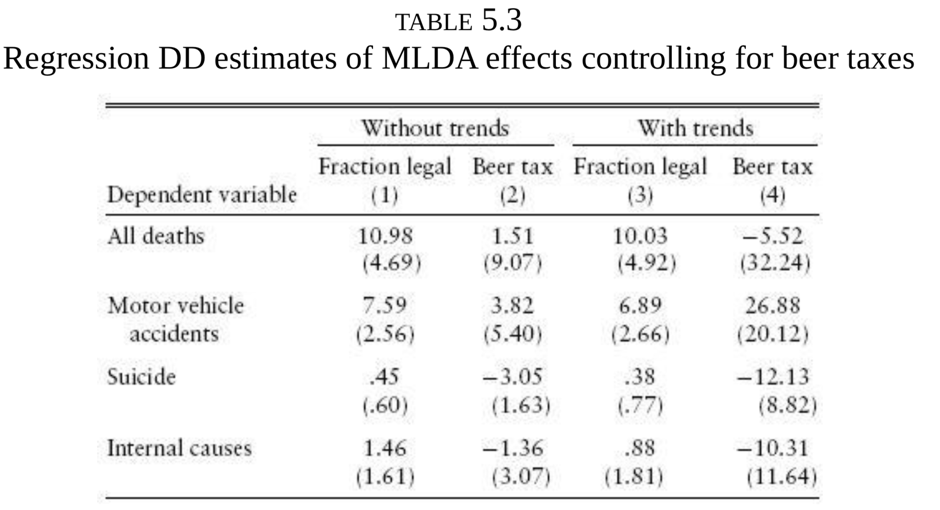

In [2]:
clear
// set to directory where data is located
cd "/Users/datalab/github/css/data/"

use cardkrueger1994



/Users/datalab/github/css/data

(Dataset from Card&Krueger (1994))


In [3]:
d


Contains data from cardkrueger1994.dta
  obs:           820                          Dataset from Card&Krueger (1994)
 vars:             8                          8 Jul 2019 00:00
 size:        12,300                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              int     %8.0g                 Store ID
t               byte    %8.0g                 Feb. 1992 = 0; Nov. 1992 = 1
treated         long    %8.0g      treated    New Jersey = 1; Pennsylvania = 0
fte             float   %9.0g                 Output: Full Time Employment
bk              byte    %8.0g                 Burger King == 1
kfc             byte    %8.0g                 Kentuky Fried Chiken == 1
roys            byte    %8.0g                 Roy Rogers == 1
wendys          byte    %8

In [4]:
* defining interation terms
gen gd = t* treated

In [5]:
reg fte gd treated t,r


Linear regression                               Number of obs     =        801
                                                F(3, 797)         =       1.43
                                                Prob > F          =     0.2330
                                                R-squared         =     0.0080
                                                Root MSE          =      9.003

------------------------------------------------------------------------------
             |               Robust
         fte |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          gd |   2.913982   1.736818     1.68   0.094    -.4952963    6.323261
     treated |  -2.883534   1.403338    -2.05   0.040    -5.638209   -.1288592
           t |   -2.40651   1.594091    -1.51   0.132    -5.535623    .7226031
       _cons |   19.94872   1.317281    15.14   0.000     17.36297    22.53447
--------------

In [6]:
diff fte, t(treated) p(t) robust


DIFFERENCE-IN-DIFFERENCES ESTIMATION RESULTS
--------------------------------------------
Number of observations in the DIFF-IN-DIFF: 801
            Before         After    
   Control: 78             77          155
   Treated: 326            320         646
            404            397
--------------------------------------------------------
 Outcome var.   | fte     | S. Err. |   |t|   |  P>|t|
----------------+---------+---------+---------+---------
Before          |         |         |         | 
   Control      | 19.949  |         |         | 
   Treated      | 17.065  |         |         | 
   Diff (T-C)   | -2.884  | 1.403   | -2.05   | 0.040**
After           |         |         |         | 
   Control      | 17.542  |         |         | 
   Treated      | 17.573  |         |         | 
   Diff (T-C)   | 0.030   | 1.023   | 0.03    | 0.976
                |         |         |         | 
Diff-in-Diff    | 2.914   | 1.737   | 1.68    | 0.094*
------------------------------

In [7]:
reg fte gd treated t bk kfc roys, r


Linear regression                               Number of obs     =        801
                                                F(6, 794)         =      57.30
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1878
                                                Root MSE          =     8.1617

------------------------------------------------------------------------------
             |               Robust
         fte |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          gd |    2.93502   1.543422     1.90   0.058    -.0946504     5.96469
     treated |  -2.323906   1.253701    -1.85   0.064    -4.784867    .1370549
           t |  -2.402678   1.410265    -1.70   0.089    -5.170966    .3656108
          bk |   .9168795   .9382545     0.98   0.329    -.9248729    2.758632
         kfc |

In [8]:
diff fte,t(treated) p(t) cov(bk kfc roys) robust

DIFFERENCE-IN-DIFFERENCES WITH COVARIATES
-----------------------------------------

DIFFERENCE-IN-DIFFERENCES ESTIMATION RESULTS
--------------------------------------------
Number of observations in the DIFF-IN-DIFF: 801
            Before         After    
   Control: 78             77          155
   Treated: 326            320         646
            404            397
--------------------------------------------------------
 Outcome var.   | fte     | S. Err. |   |t|   |  P>|t|
----------------+---------+---------+---------+---------
Before          |         |         |         | 
   Control      | 21.161  |         |         | 
   Treated      | 18.837  |         |         | 
   Diff (T-C)   | -2.324  | 1.254   | -1.85   | 0.064*
After           |         |         |         | 
   Control      | 18.758  |         |         | 
   Treated      | 19.369  |         |         | 
   Diff (T-C)   | 0.611   | 0.900   | 0.68    | 0.497
                |         |         |         | 
Di

In [9]:
diff fte, t(treated) p(t) cov(bk kfc roys wendys) test

TWO-SAMPLE T TEST
-----------------

Number of observations (baseline): 404
            Before         After    
   Control: 78             -           78
   Treated: 326            -           326
            404            -

t-test at period = 0:
--------------------------------------------------------------------------------
> --------------
 Variable(s)         |   Mean Control   | Mean Treated |    Diff.   |   |t|   | 
>  Pr(|T|>|t|)
---------------------+------------------+--------------+------------+---------+-
> --------------
fte                  | 19.949           | 17.065       | -2.884     |  2.44   | 
> 0.0150**
bk                   | 0.436            | 0.408        | -0.028     |  0.45   | 
> 0.6538
kfc                  | 0.154            | 0.209        | 0.055      |  1.09   | 
> 0.2769
roys                 | 0.218            | 0.252        | 0.034      |  0.62   | 
> 0.5368
wendys               | 0.192            | 0.132        | -0.060     |  1.37   | 
> 0.1726
------

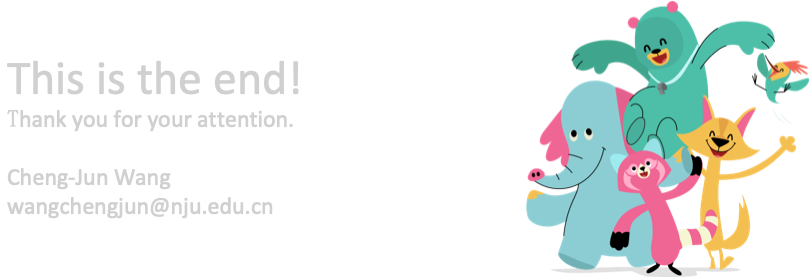